In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline


In [31]:
df = pd.read_csv('C:/Users/10738686/Downloads/bookings_regre.csv')


In [32]:
df.shape

(109711, 26)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109711 entries, 0 to 109710
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HOTEL                           109711 non-null  object 
 1   IS_CANCELED                     109711 non-null  int64  
 2   LEAD_TIME                       109711 non-null  int64  
 3   ARRIVAL_DATE_YEAR               109711 non-null  int64  
 4   MONTH                           109711 non-null  int64  
 5   ARRIVAL_DATE_WEEK_NUMBER        109711 non-null  int64  
 6   ARRIVAL_DATE_DAY_OF_MONTH       109711 non-null  int64  
 7   RESERVATION_STATUS              109711 non-null  object 
 8   TOTAL_STAY_NIGHTS               109711 non-null  int64  
 9   STAYS_IN_WEEKEND_NIGHTS         109711 non-null  int64  
 10  STAYS_IN_WEEK_NIGHTS            109711 non-null  int64  
 11  ADULTS                          109711 non-null  int64  
 12  CHILDREN        

In [34]:
df.columns = df.columns.str.lower()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109711 entries, 0 to 109710
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           109711 non-null  object 
 1   is_canceled                     109711 non-null  int64  
 2   lead_time                       109711 non-null  int64  
 3   arrival_date_year               109711 non-null  int64  
 4   month                           109711 non-null  int64  
 5   arrival_date_week_number        109711 non-null  int64  
 6   arrival_date_day_of_month       109711 non-null  int64  
 7   reservation_status              109711 non-null  object 
 8   total_stay_nights               109711 non-null  int64  
 9   stays_in_weekend_nights         109711 non-null  int64  
 10  stays_in_week_nights            109711 non-null  int64  
 11  adults                          109711 non-null  int64  
 12  children        

In [36]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 17 numerical features : ['is_canceled', 'lead_time', 'arrival_date_year', 'month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'total_stay_nights', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'total_room_nights', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr']

We have 9 categorical features : ['hotel', 'reservation_status', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']


In [37]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
hotel,0,0.0
is_canceled,0,0.0
customer_type,0,0.0
days_in_waiting_list,0,0.0
deposit_type,0,0.0
reserved_room_type,0,0.0
previous_bookings_not_canceled,0,0.0
previous_cancellations,0,0.0
distribution_channel,0,0.0
market_segment,0,0.0


In [38]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
df.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,is_canceled,lead_time,arrival_date_year,month,arrival_date_week_number,arrival_date_day_of_month,total_stay_nights,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,total_room_nights,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,adr
count,109711.000000,109711.000000,109711.000000,109711.000000,109711.000000,109711.000000,109711.000000,109711.000000,109711.000000,109711.000000,109711.000000,109711.000000,109711.000000,109711.000000,109711.000000,109711.000000,109711.000000
mean,0.377820,106.741284,2022.155171,6.540739,27.112441,15.775683,3.416768,0.922852,2.493916,1.850152,0.039194,0.006672,3.423987,0.092106,0.132065,2.490799,99.474804
std,0.484844,108.182532,0.708159,3.096356,13.628256,8.774825,2.510595,0.990627,1.878828,0.474935,0.208721,0.090629,2.524249,0.877224,1.494057,18.249720,44.676307
min,0.000000,0.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000
25%,0.000000,19.000000,2022.000000,4.000000,16.000000,8.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,69.300000
50%,0.000000,72.000000,2022.000000,7.000000,27.000000,16.000000,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,93.090000
75%,1.000000,164.000000,2023.000000,9.000000,38.000000,23.000000,4.000000,2.000000,3.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,121.500000
max,1.000000,709.000000,2023.000000,12.000000,53.000000,31.000000,69.000000,19.000000,50.000000,4.000000,10.000000,10.000000,69.000000,26.000000,72.000000,391.000000,5400.000000


In [39]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
df.describe(include= 'object')

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,hotel,reservation_status,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
count,109711,109711,109711,109711,109711,109711,109711,109711,109711
unique,2,3,5,174,7,5,3,3,4
top,City Hotel,Check.Out,BB,PRT,Online TA,TA/TO,A,No Deposit,Transient
freq,74695,68260,84312,45050,50966,91411,84376,94983,81487


In [14]:
print('-'*100)
print('The percentage of each category in categorical column are as follow : ')
print('-'*100 +'\n')
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('-'*100)

----------------------------------------------------------------------------------------------------
The percentage of each category in categorical column are as follow : 
----------------------------------------------------------------------------------------------------

reservation_status
Check.Out    62.218009
Canceled     36.775711
No.Show       1.006280
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
meal
BB           76.849176
HB           12.090857
SC            9.404709
Undefined     0.988050
FB            0.667207
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
country
PRT    41.062428
GBR    10.174914
FRA     8.878782
ESP     7.014793
DEU     6.375842
         ...    
PYF     0.000911
PLW     0.000911
SMR     0.000911
BWA     0.000911
BDI     0.000911
Name: proportion, Length: 174, dtype: float64
---------

ValueError: num must be an integer with 1 <= num <= 9, not 10

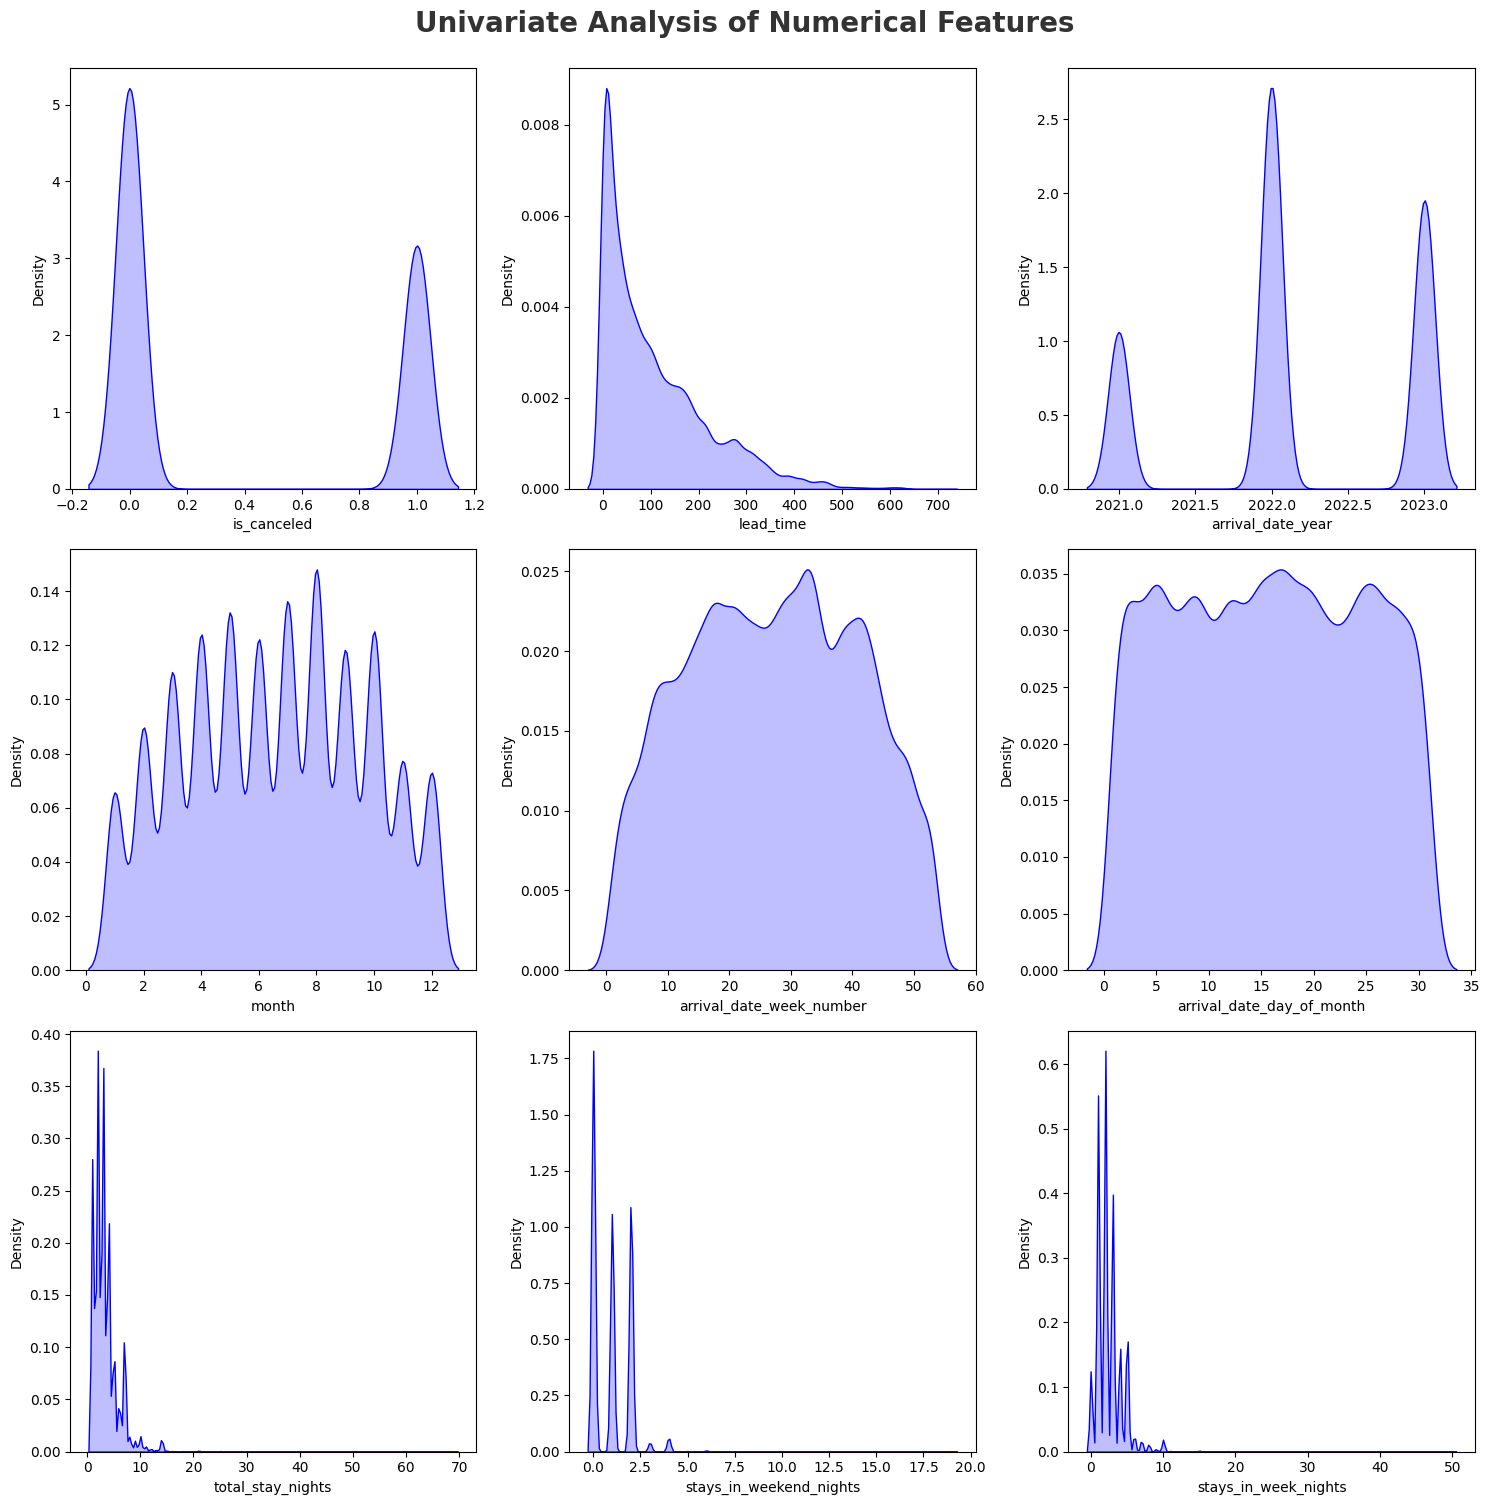

In [40]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

ValueError: num must be an integer with 1 <= num <= 9, not 10

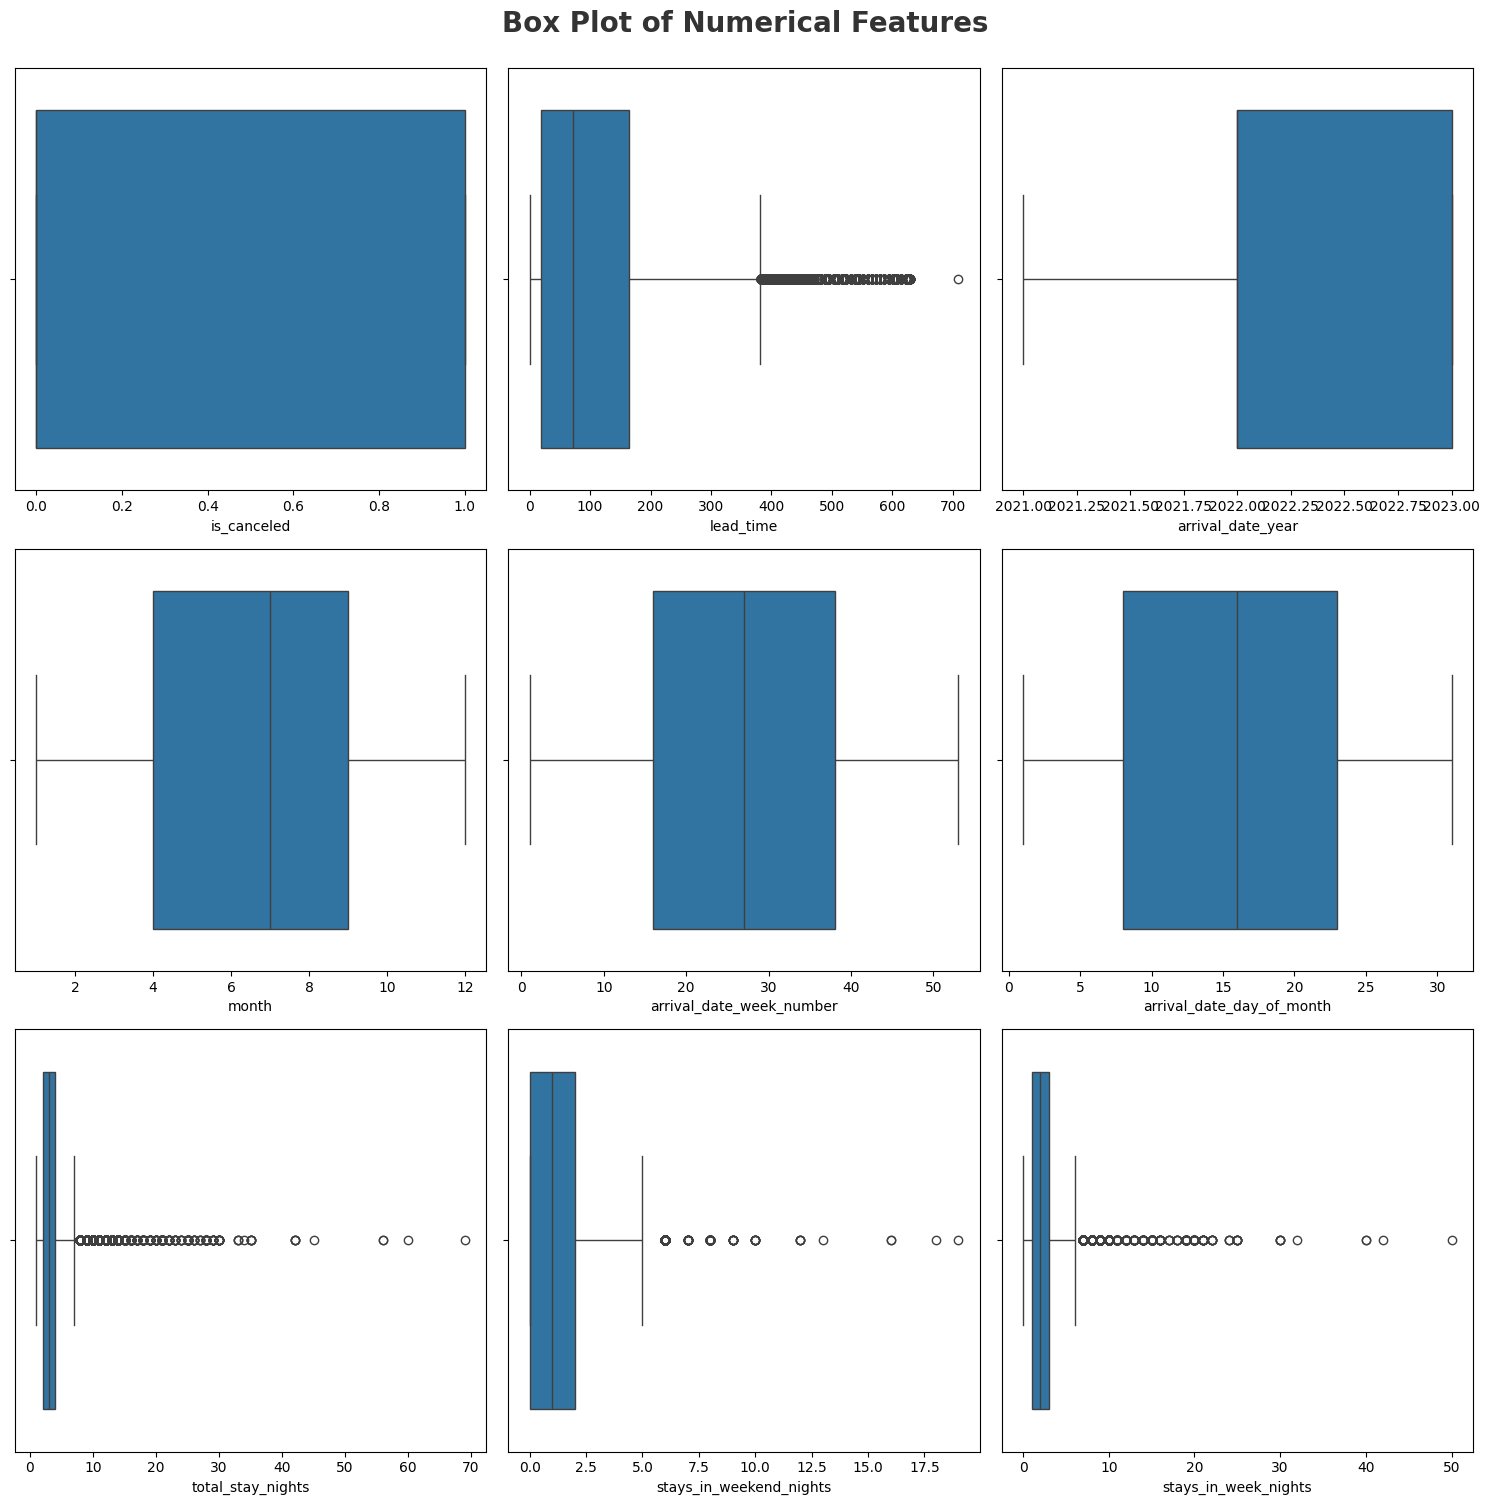

In [41]:
plt.figure(figsize=(15, 15))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [45]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)


Num of continuos features: ['lead_time', 'month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'total_stay_nights', 'stays_in_weekend_nights', 'stays_in_week_nights', 'total_room_nights', 'previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'adr']


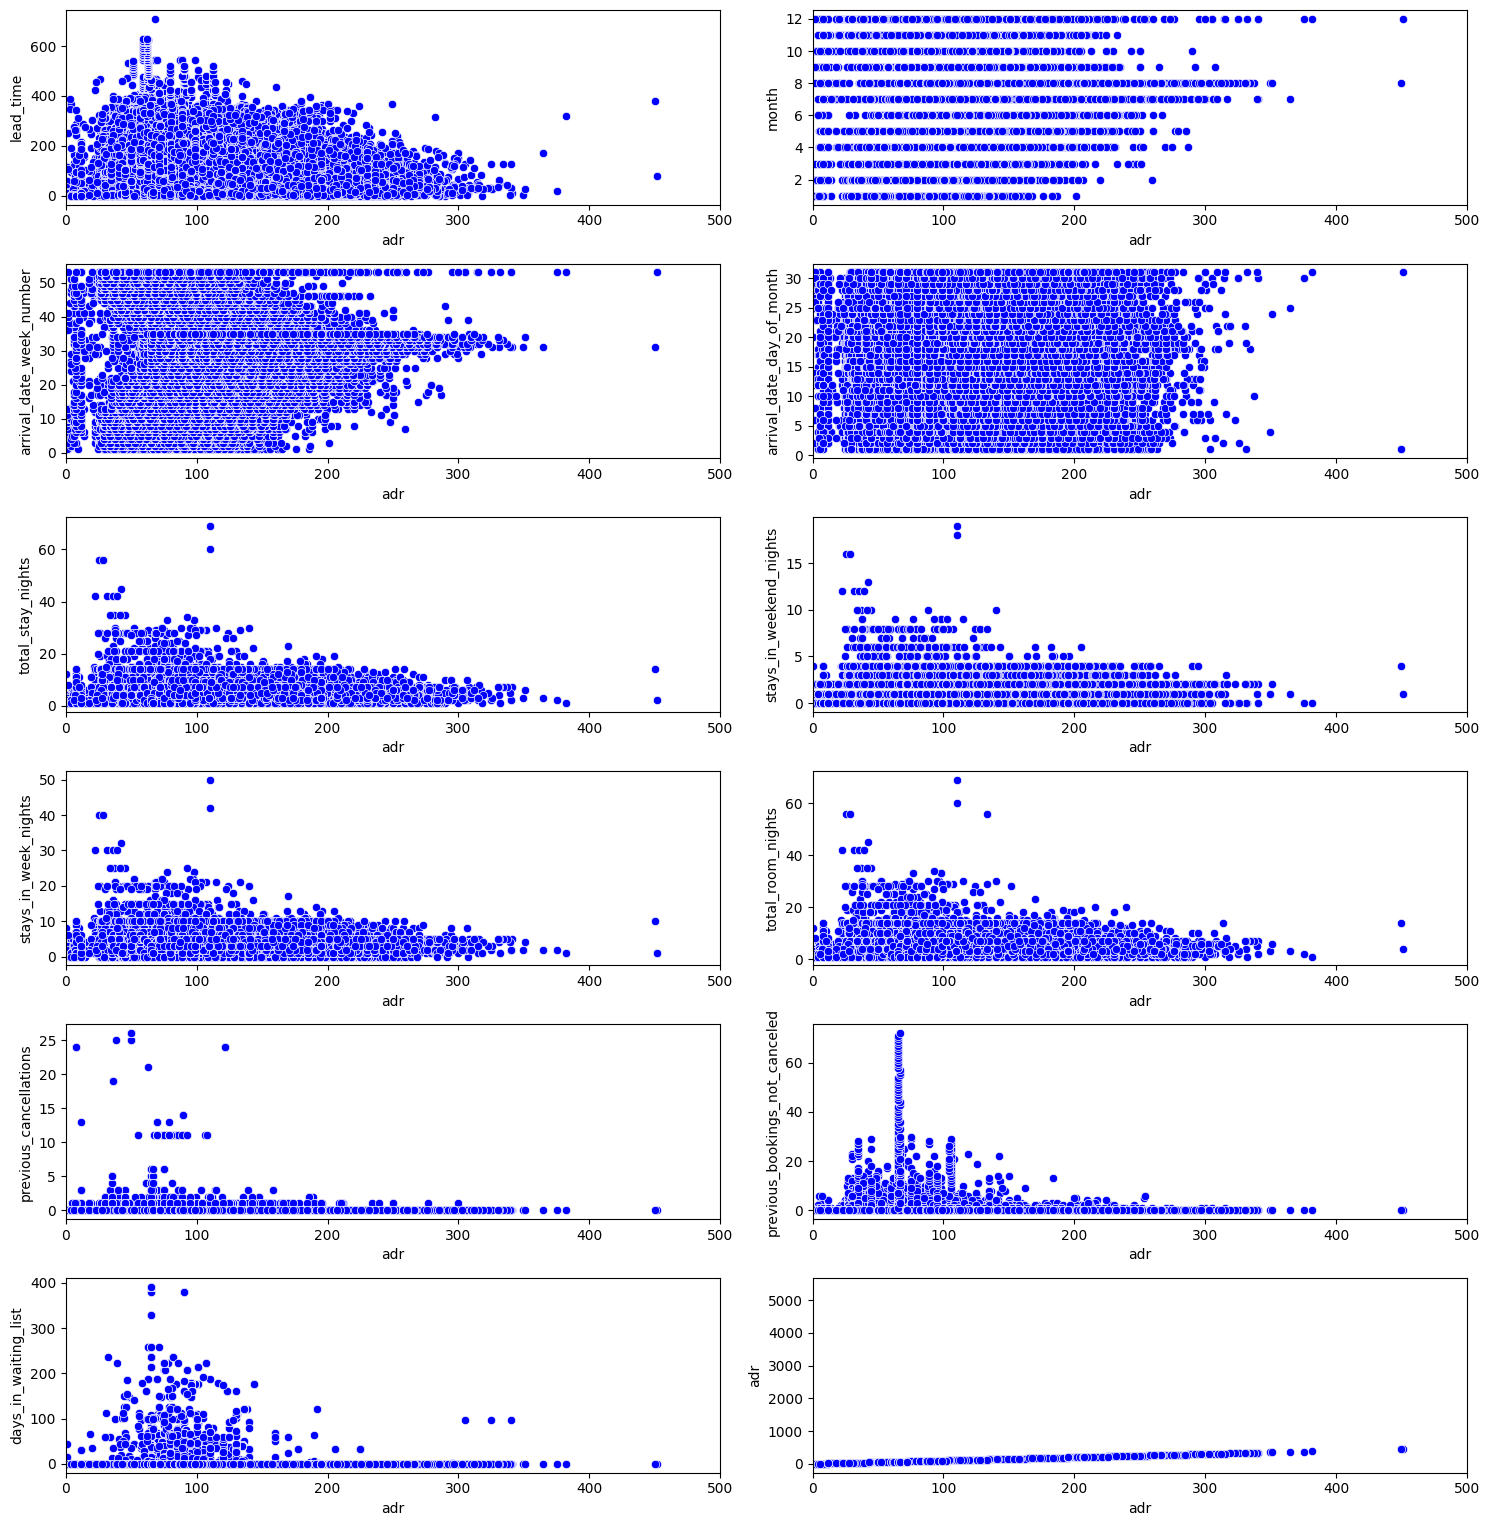

In [46]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='adr', y=continuous_features[i], color='b')
    plt.xlim(0,500) 
    plt.tight_layout()

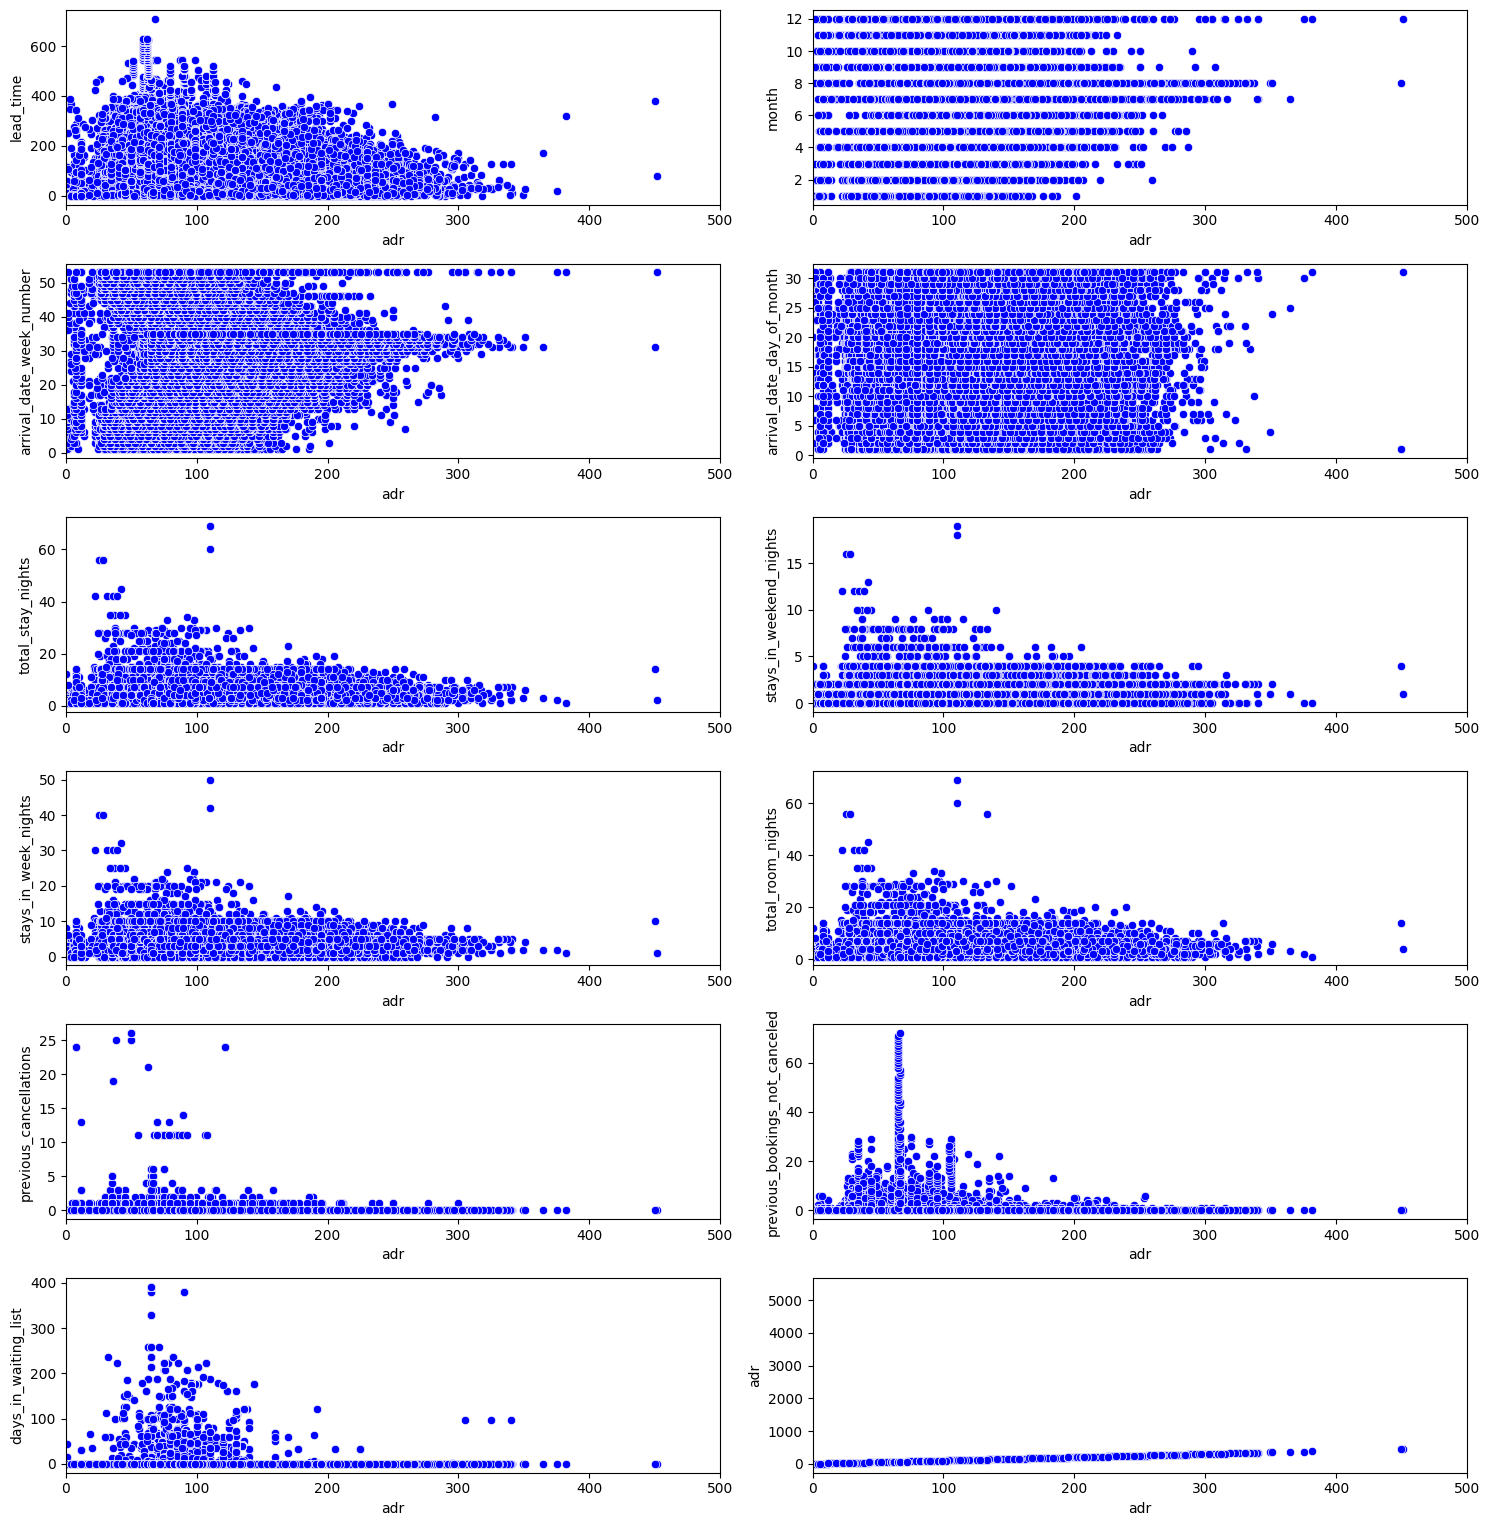

In [47]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='adr', y=continuous_features[i], color='b')
    plt.xlim(0,500) # 
    plt.tight_layout()

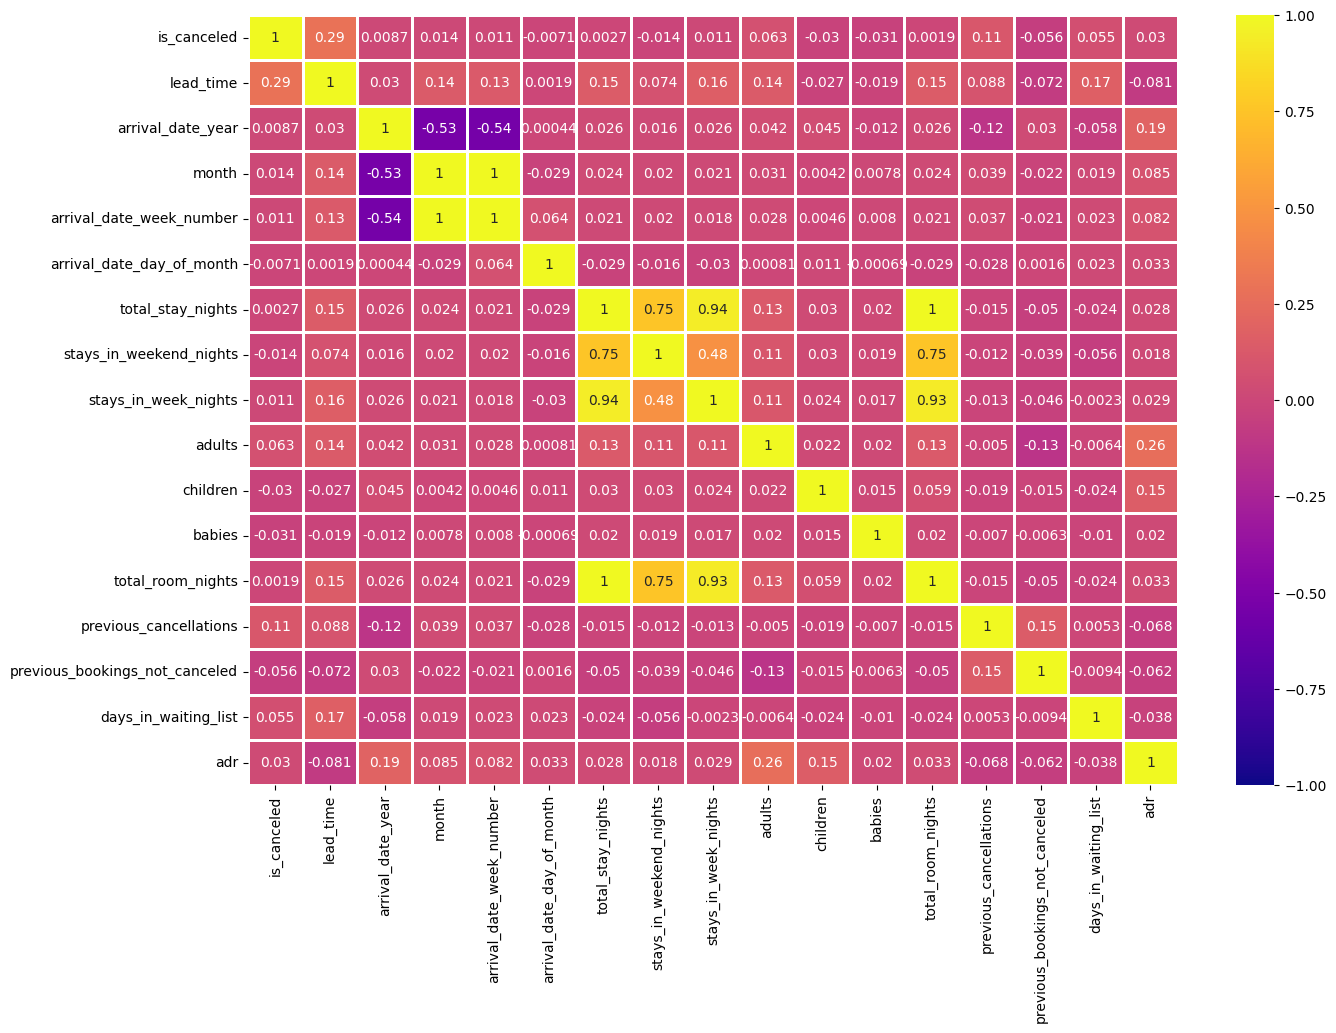

In [48]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df[numeric_features].corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

In [49]:
from scipy.stats import chi2_contingency
chi2_test = []

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['adr'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
test_result = pd.DataFrame(data=[categorical_features, chi2_test]).T
test_result.columns = ['Categorical Features', 'Hypothesis Result']

print('-'*100)
print('Chi-Squarred Test (Checking Multi-collinearity for  Categorical features) results are as follows :')
print('-'*100)

test_result

----------------------------------------------------------------------------------------------------
Chi-Squarred Test (Checking Multi-collinearity for  Categorical features) results are as follows :
----------------------------------------------------------------------------------------------------


,Categorical Features,Hypothesis Result
0,hotel,Reject Null Hypothesis
1,reservation_status,Reject Null Hypothesis
2,meal,Reject Null Hypothesis
3,country,Reject Null Hypothesis
4,market_segment,Reject Null Hypothesis
5,distribution_channel,Reject Null Hypothesis
6,reserved_room_type,Reject Null Hypothesis
7,deposit_type,Reject Null Hypothesis
8,customer_type,Reject Null Hypothesis


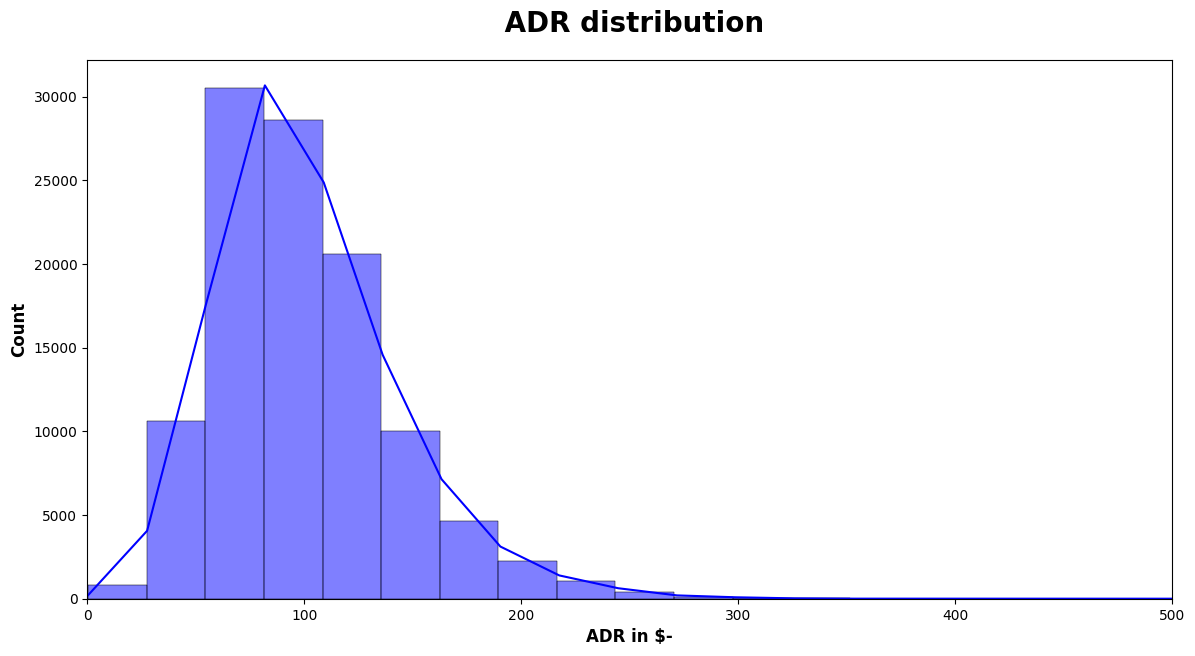

In [50]:
 #(Target Feature Distribution)
plt.subplots(figsize=(14,7))
sns.histplot(df.adr, bins=200, kde=True, color = 'b')
plt.title(" ADR distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("ADR in $-", weight="bold", fontsize=12)
plt.xlim(0,500)
plt.show()

In [51]:
# Creating copy of  original dataframe

df_model=df.copy()

df_model

,hotel,is_canceled,lead_time,arrival_date_year,month,arrival_date_week_number,arrival_date_day_of_month,reservation_status,total_stay_nights,stays_in_weekend_nights,...,country,market_segment,distribution_channel,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
0,Resort Hotel,1,75,2021,7,27,1,Canceled,3,0,...,PRT,Offline TA/TO,TA/TO,0,0,D,No Deposit,0,Transient,105.50
1,City Hotel,1,65,2021,7,27,1,Canceled,4,0,...,PRT,Online TA,TA/TO,0,0,A,No Deposit,0,Transient,68.00
2,Resort Hotel,1,85,2021,7,27,1,Canceled,3,0,...,PRT,Online TA,TA/TO,0,0,A,No Deposit,0,Transient,82.00
3,Resort Hotel,1,60,2021,7,27,1,Canceled,7,2,...,PRT,Online TA,TA/TO,0,0,E,No Deposit,0,Transient,107.00
4,Resort Hotel,1,96,2021,7,27,1,Canceled,10,2,...,PRT,Direct,Direct,0,0,E,No Deposit,0,Transient,108.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109706,City Hotel,0,102,2023,8,35,31,Check.Out,7,2,...,FRA,Online TA,TA/TO,0,0,E,No Deposit,0,Transient,225.43
109707,Resort Hotel,0,217,2023,8,35,31,Check.Out,9,2,...,GBR,Offline TA/TO,TA/TO,0,0,D,No Deposit,0,Contract,110.80
109708,Resort Hotel,0,212,2023,8,35,31,Check.Out,10,2,...,GBR,Offline TA/TO,TA/TO,0,0,A,No Deposit,0,Transient,89.75
109709,Resort Hotel,0,161,2023,8,35,31,Check.Out,14,4,...,DEU,Offline TA/TO,TA/TO,0,0,A,No Deposit,0,Transient,99.06


In [65]:
df_model.drop(labels=['total_room_nights', 'stays_in_week_nights','total_stay_nights'],axis=1,inplace=True)
df_model
#We have 9 categorical features : ['hotel', 'reservation_status', 'meal', 'country', 'market_segment', 'distribution_channel', 
#'reserved_room_type', 'deposit_type', 'customer_type']

,hotel,is_canceled,lead_time,reservation_status,adults,children,babies,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,days_in_waiting_list,customer_type,adr
0,Resort Hotel,1,75,Canceled,2,0,0,HB,Offline TA/TO,TA/TO,D,No Deposit,0,Transient,105.50
1,City Hotel,1,65,Canceled,1,0,0,BB,Online TA,TA/TO,A,No Deposit,0,Transient,68.00
2,Resort Hotel,1,85,Canceled,2,0,0,BB,Online TA,TA/TO,A,No Deposit,0,Transient,82.00
3,Resort Hotel,1,60,Canceled,2,0,0,BB,Online TA,TA/TO,E,No Deposit,0,Transient,107.00
4,Resort Hotel,1,96,Canceled,2,0,0,BB,Direct,Direct,E,No Deposit,0,Transient,108.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109706,City Hotel,0,102,Check.Out,3,0,0,BB,Online TA,TA/TO,E,No Deposit,0,Transient,225.43
109707,Resort Hotel,0,217,Check.Out,2,0,0,HB,Offline TA/TO,TA/TO,D,No Deposit,0,Contract,110.80
109708,Resort Hotel,0,212,Check.Out,2,1,0,BB,Offline TA/TO,TA/TO,A,No Deposit,0,Transient,89.75
109709,Resort Hotel,0,161,Check.Out,2,0,0,HB,Offline TA/TO,TA/TO,A,No Deposit,0,Transient,99.06


In [66]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109711 entries, 0 to 109710
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   hotel                 109711 non-null  object 
 1   is_canceled           109711 non-null  int64  
 2   lead_time             109711 non-null  int64  
 3   reservation_status    109711 non-null  object 
 4   adults                109711 non-null  int64  
 5   children              109711 non-null  int64  
 6   babies                109711 non-null  int64  
 7   meal                  109711 non-null  object 
 8   market_segment        109711 non-null  object 
 9   distribution_channel  109711 non-null  object 
 10  reserved_room_type    109711 non-null  object 
 11  deposit_type          109711 non-null  object 
 12  days_in_waiting_list  109711 non-null  int64  
 13  customer_type         109711 non-null  object 
 14  adr                   109711 non-null  float64
dtype

In [67]:
df_model=pd.get_dummies(df_model,dtype=float)
df_model

,is_canceled,lead_time,adults,children,babies,days_in_waiting_list,adr,hotel_City Hotel,hotel_Resort Hotel,reservation_status_Canceled,...,reserved_room_type_A,reserved_room_type_D,reserved_room_type_E,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient.Party
0,1,75,2,0,0,0,105.50,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,65,1,0,0,0,68.00,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,85,2,0,0,0,82.00,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,60,2,0,0,0,107.00,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,96,2,0,0,0,108.30,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109706,0,102,3,0,0,0,225.43,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
109707,0,217,2,0,0,0,110.80,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
109708,0,212,2,1,0,0,89.75,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
109709,0,161,2,0,0,0,99.06,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
df_model.dtypes

is_canceled                         int64
lead_time                           int64
adults                              int64
children                            int64
babies                              int64
days_in_waiting_list                int64
adr                               float64
hotel_City Hotel                  float64
hotel_Resort Hotel                float64
reservation_status_Canceled       float64
reservation_status_Check.Out      float64
reservation_status_No.Show        float64
meal_BB                           float64
meal_FB                           float64
meal_HB                           float64
meal_SC                           float64
meal_Undefined                    float64
market_segment_Aviation           float64
market_segment_Complementary      float64
market_segment_Corporate          float64
market_segment_Direct             float64
market_segment_Groups             float64
market_segment_Offline TA/TO      float64
market_segment_Online TA          

In [69]:
X=df_model.drop('adr',axis=1)      # Feature Matrix
X

,is_canceled,lead_time,adults,children,babies,days_in_waiting_list,hotel_City Hotel,hotel_Resort Hotel,reservation_status_Canceled,reservation_status_Check.Out,...,reserved_room_type_A,reserved_room_type_D,reserved_room_type_E,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient.Party
0,1,75,2,0,0,0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,65,1,0,0,0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,85,2,0,0,0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,60,2,0,0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,96,2,0,0,0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109706,0,102,3,0,0,0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
109707,0,217,2,0,0,0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
109708,0,212,2,1,0,0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
109709,0,161,2,0,0,0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [70]:
y=df_model['adr']    # Target Variable
y

0         105.50
1          68.00
2          82.00
3         107.00
4         108.30
           ...  
109706    225.43
109707    110.80
109708     89.75
109709     99.06
109710    112.80
Name: adr, Length: 109711, dtype: float64

In [71]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()

print(model.fit(X,y))

ExtraTreesRegressor()


In [72]:
print('-'*50)
print('Checking for feature importance')
print('-'*50)

print(model.feature_importances_)

--------------------------------------------------
Checking for feature importance
--------------------------------------------------
[2.48469323e-03 4.46287761e-01 7.13977651e-02 1.90055831e-02
 2.89326440e-03 1.03543772e-02 3.98996179e-02 3.07614471e-02
 7.76327182e-03 2.90021330e-03 1.17148448e-03 3.19095194e-02
 3.03927785e-03 3.38553308e-02 6.59088979e-04 1.97746809e-03
 4.82753962e-04 9.33980488e-04 2.46969178e-03 2.40896425e-02
 2.10428445e-02 3.27961462e-02 4.65022339e-02 4.33361130e-03
 3.62756324e-03 5.24735297e-04 5.21126626e-03 2.01169130e-06
 1.14939152e-01 6.60861700e-03 3.98499647e-03 1.17660942e-03
 5.93487788e-03 2.36245835e-04 1.51137290e-03 1.54350989e-03
 9.47301203e-03 6.21496167e-03]


In [78]:
imp_feature = pd.Series(model.feature_importances_, index = X.columns)
imp_feature.nlargest(10).plot(kind = 'barh', color='red')
plt.title('Important Features', fontsize=16)
plt.show()

AttributeError: type object 'Lasso' has no attribute 'feature_importances_'

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [76]:
models = [ LinearRegression, SVR, DecisionTreeRegressor, RandomForestRegressor, Ridge, Lasso]
mse = []
rmse = []
evs = []
r_square_score = []

for model in models:
    regressor = model().fit(X_train, y_train)
    pred = regressor.predict(X_test)
    mse.append(mean_squared_error(y_true= y_test, y_pred= pred))
    rmse.append(np.sqrt(mean_squared_error(y_true= y_test, y_pred= pred)))
    evs.append(explained_variance_score(y_true= y_test, y_pred= pred))
    r_square_score.append(r2_score(y_true= y_test, y_pred= pred))

In [77]:
ML_model_df=pd.DataFrame({"Model":[ 'Linear Regression', 'Support Vector Rregression', 'Decision Tree Regressor', \
                                   'Random Forest Regressor', 'Ridge', 'Lasso'],
                         "Mean Squarred Error":mse,
                         "Root Mean Squarred Error":rmse,
                         "Explained Variance Score":evs,
                         "R-Sqaure Score(Accuracy)":r_square_score})

ML_model_df.set_index('Model',inplace=True)
ML_model_df

,Mean Squarred Error,Root Mean Squarred Error,Explained Variance Score,R-Sqaure Score(Accuracy)
Model,,,,
Linear Regression,1185.439785,34.430216,0.335966,0.335882
Support Vector Rregression,1748.966948,41.820652,0.047938,0.020177
Decision Tree Regressor,1090.125316,33.017046,0.389325,0.389280
Random Forest Regressor,946.591964,30.766735,0.469713,0.469691
Ridge,1185.391157,34.429510,0.335994,0.335909
Lasso,1303.089521,36.098331,0.270033,0.269971


In [ ]:
import pickle

saved_models = []

for model_class in models:
    model = model_class()
    regressor = model.fit(X_train, y_train)
    
    # Save the trained model to a pickle file
    model_filename = f"{model_class.__name__}_model.pkl"
    with open(model_filename, 'wb') as model_file:
        pickle.dump(regressor, model_file)

    saved_models.append(model_filename)

In [ ]:
saved_models

In [ ]:
import pickle


with open('saved_models.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
df_model.drop(labels=['']axis=1,inplace=True))